In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Analysis/Resume Type Checker/UpdatedResumeDataSet.csv' ,encoding='utf-8')
df['cleaned_resume'] = ''


In [83]:
df.head(10)

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...,
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...,
9,Data Science,Expertise â Data and Quantitative Analysis â...,


In [84]:
df.shape

(962, 3)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        962 non-null    object
 1   Resume          962 non-null    object
 2   cleaned_resume  962 non-null    object
dtypes: object(3)
memory usage: 22.7+ KB


In [86]:
df['Category'].value_counts()

,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Blockchain,40
ETL Developer,40


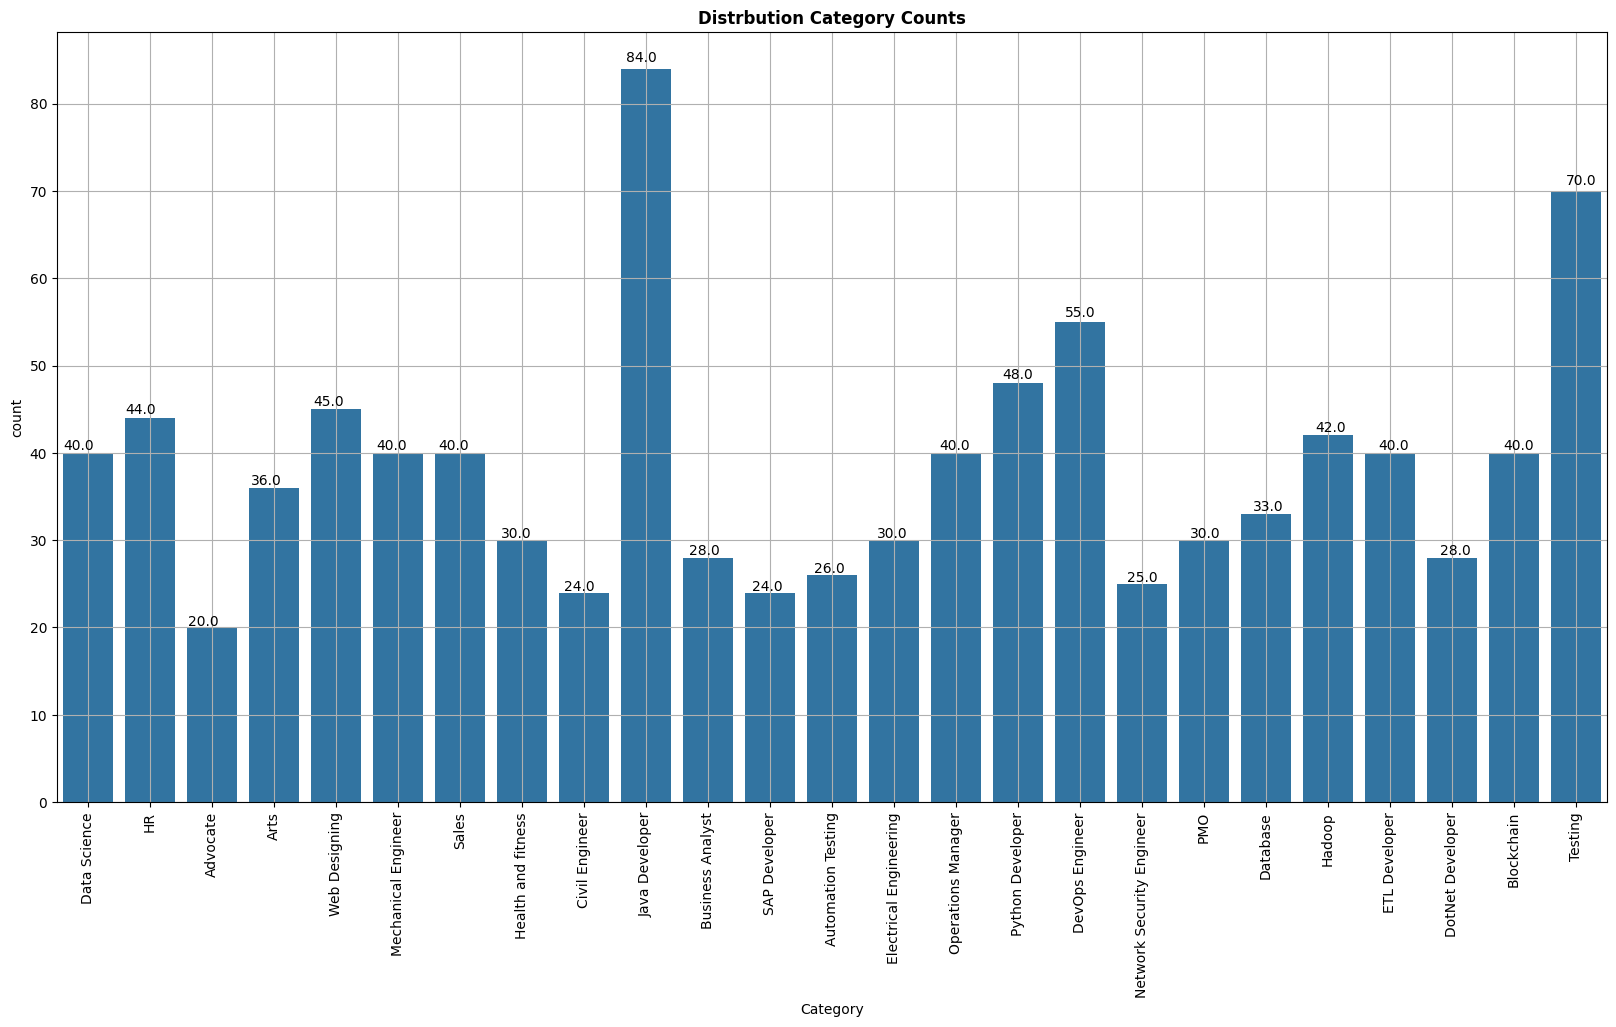

In [87]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.title("Distrbution Category Counts",fontweight='bold')
ax=sns.countplot(x="Category", data=df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()



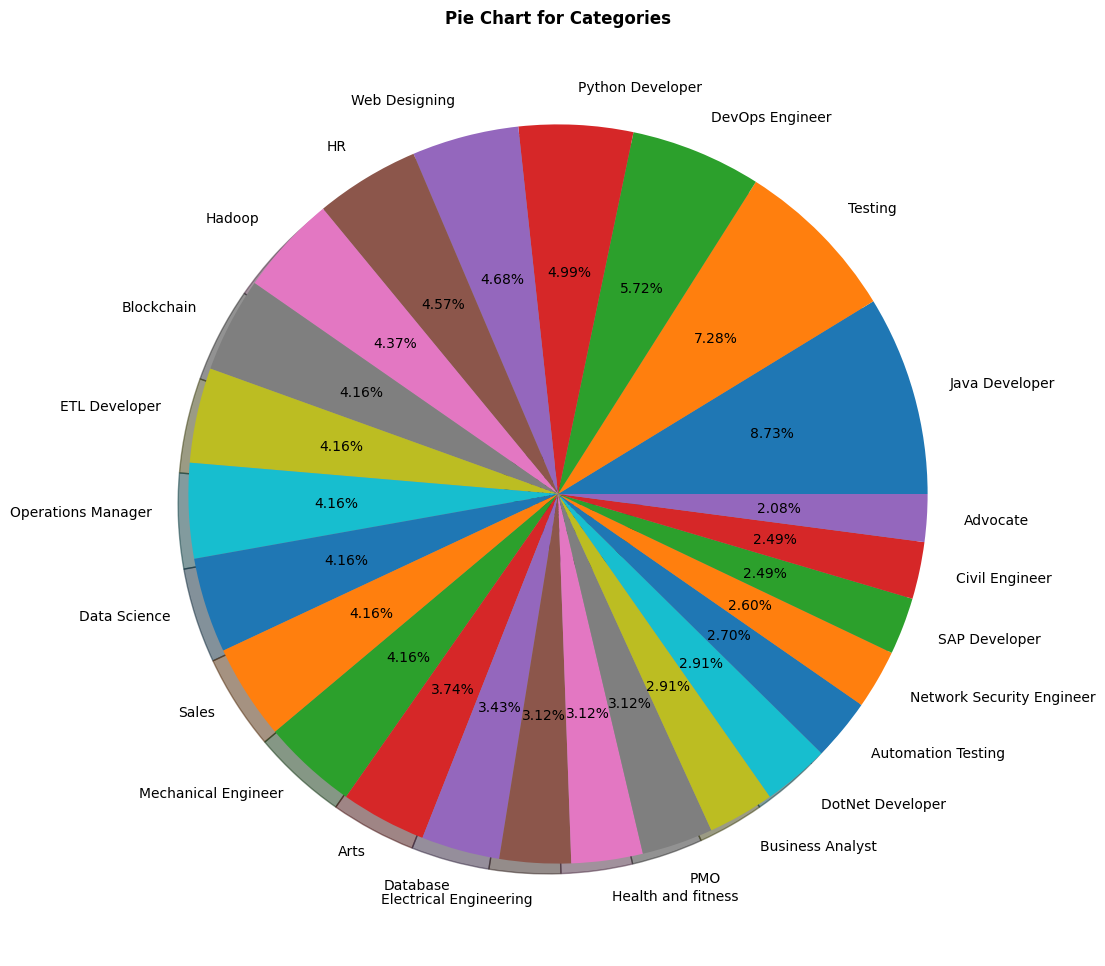

In [88]:
plt.figure(figsize=(12,12))
plt.pie(df["Category"].value_counts(),labels=df["Category"].value_counts().index,
       autopct="%0.02f%%", shadow =True)
plt.title("Pie Chart for Categories", fontweight='bold')
plt.show()

In [89]:
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # Remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # Remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # Remove hashtags
    resumeText = re.sub('@\S+', ' ', resumeText)  # Remove mentions
    resumeText = re.sub('[%s]' % re.escape(string.punctuation), ' ', resumeText)  # Remove punctuation
    resumeText = re.sub(r'[^\x00-\x7f]', r' ', resumeText)  # Remove non-ASCII characters
    resumeText = re.sub('\s+', ' ', resumeText).strip()  # Remove extra whitespace
    return resumeText

df['cleaned_resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [90]:
df.head(2)

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...


In [91]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df["cleaned_resume"], df["Category"], test_size=0.2, random_state=42)
print("x_train size -- >> " , x_train.shape)
print("y_train size -- >> " , y_train.shape)
print("x_test size -- >> " , x_test.shape)
print("y_test size -- >> " , y_test.shape)

x_train size -- >>  (769,)
y_train size -- >>  (769,)
x_test size -- >>  (193,)
y_test size -- >>  (193,)


In [92]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
y_train = encode.fit_transform(y_train)
y_test = encode.transform(y_test)

In [93]:
from sklearn.feature_extraction.text import CountVectorizer

vector = CountVectorizer(ngram_range=(1, 2), max_features=5000)
x_train = vector.fit_transform(x_train)
x_test = vector.transform(x_test)

# Print data shapes
print("x_train size:", x_train.shape)
print("y_train size:", y_train.shape)
print("x_test size:", x_test.shape)
print("y_test size:", y_test.shape)

x_train size: (769, 5000)
y_train size: (769,)
x_test size: (193, 5000)
y_test size: (193,)


In [94]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
def model_training_evaluation(model):
    model.fit(x_train, y_train)

    # Predictions
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    # Metrics
    train_score = accuracy_score(y_train, train_pred)
    test_score = accuracy_score(y_test, test_pred)

    train_rep = classification_report(y_train, train_pred)
    test_rep = classification_report(y_test, test_pred)

    train_cm = confusion_matrix(y_train, train_pred)
    test_cm = confusion_matrix(y_test, test_pred)

    print("\n### Model Performance Evaluation ###\n")

    print("#### Train Data Performance ####")
    print(f"Train Accuracy Score: {train_score:.4f}")
    print(f"Train Classification Report:\n{train_rep}")
    print(f"Train Confusion Matrix:\n{train_cm}")

    print("\n#### Test Data Performance ####")
    print(f"Test Accuracy Score: {test_score:.4f}")
    print(f"Test Classification Report:\n{test_rep}")
    print(f"Test Confusion Matrix:\n{test_cm}")

In [95]:
from sklearn.tree import DecisionTreeClassifier
model_dt = OneVsRestClassifier(DecisionTreeClassifier())
model_training_evaluation(model_dt)


### Model Performance Evaluation ###

#### Train Data Performance ####
Train Accuracy Score: 1.0000
Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        33
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00        35
           7       1.00      1.00      1.00        25
           8       1.00      1.00      1.00        41
           9       1.00      1.00      1.00        23
          10       1.00      1.00      1.00        33
          11       1.00      1.00      1.00        24
          12       1.00      1.00      1.00        32
          13       1.00      1.00      1.00        38
          14       1.00      1.00      1.00        23
     

In [96]:
from sklearn.neighbors import KNeighborsClassifier
model = OneVsRestClassifier(KNeighborsClassifier())
model_training_evaluation(model)


### Model Performance Evaluation ###

#### Train Data Performance ####
Train Accuracy Score: 0.9688
Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.53      0.69        17
           1       1.00      1.00      1.00        30
           2       1.00      0.62      0.76        21
           3       1.00      1.00      1.00        33
           4       1.00      1.00      1.00        24
           5       0.82      0.93      0.88        15
           6       0.95      1.00      0.97        35
           7       1.00      0.84      0.91        25
           8       1.00      0.93      0.96        41
           9       0.96      1.00      0.98        23
          10       1.00      1.00      1.00        33
          11       1.00      1.00      1.00        24
          12       0.74      1.00      0.85        32
          13       1.00      1.00      1.00        38
          14       1.00      1.00      1.00        23
     

In [97]:
log_reg = OneVsRestClassifier(LogisticRegression(max_iter=500))
log_reg.fit(x_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=500))

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
def pred(text):
    clean_text = cleanResume(text)  # Clean input text
    vectorize_text = vector.transform([clean_text])  # Transform using trained vectorizer
    predicted = log_reg.predict(vectorize_text)  # Predict category
    predicted_value = encode.inverse_transform(predicted)
    return predicted_value[0]

In [100]:
myresume ="""I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

print("\nPredicted Category:", pred(myresume))


Predicted Category: Data Science
